# Spam Detection

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df0=pd.read_csv('C:/Users/evilk/Downloads/archive(1)/spam.csv')
df0.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df0.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df0.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df0[df0['Category']=='spam'].shape

(747, 2)

In [7]:
df0[df0['Category']=='ham'].shape

(4825, 2)

In [8]:
df0.shape

(5572, 2)

In [9]:
df0["Message"]=df0["Message"].str.lower()
df0.head(10)

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
5,spam,freemsg hey there darling it's been 3 week's n...
6,ham,even my brother is not like to speak with me. ...
7,ham,as per your request 'melle melle (oru minnamin...
8,spam,winner!! as a valued network customer you have...
9,spam,had your mobile 11 months or more? u r entitle...


In [10]:
import re

# Symbol Clean

In [11]:
df1=df0.copy()
df1.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [12]:
df1["CleanMessage"]=df0["Message"].apply(lambda x : re.sub(r'[^\w\s]','',x))
df1.head(10)

,Category,Message,CleanMessage
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...
6,ham,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...
8,spam,winner!! as a valued network customer you have...,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...


# Digits clean

In [13]:
df2=df1.copy()
df2["CleanMessage"]=df1["CleanMessage"].apply(lambda x : re.sub(r'\d+','',x))
df2.head(10)

,Category,Message,CleanMessage
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been weeks now ...
6,ham,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...
8,spam,winner!! as a valued network customer you have...,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more? u r entitle...,had your mobile months or more u r entitled t...


In [14]:
df2["CleanMessage"] = df2["CleanMessage"].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df2.head(10)

,Category,Message,CleanMessage
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been weeks now a...
6,ham,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...
8,spam,winner!! as a valued network customer you have...,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more? u r entitle...,had your mobile months or more u r entitled to...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [20]:
X=vectorizer.fit_transform(df2['CleanMessage'])

In [27]:
X.shape

(5572, 8609)

In [28]:
y=df2["Category"]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [34]:
Model=MultinomialNB()

In [35]:
Model.fit(X_train,y_train)
Model.score(X_test,y_test)

0.9694976076555024

In [36]:
y_pre=Model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pre)

<Axes: >

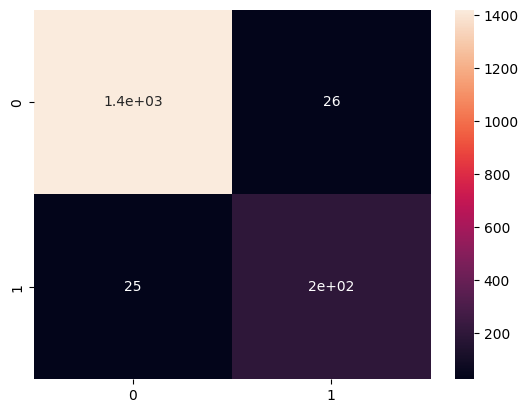

In [40]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pre))


              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1448
        spam       0.88      0.89      0.89       224

    accuracy                           0.97      1672
   macro avg       0.93      0.94      0.93      1672
weighted avg       0.97      0.97      0.97      1672

